In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from main import read_file_df

# DATA COLLECTION

In [2]:
file_path = 'https://archive.ics.uci.edu/static/public/864/room+occupancy+estimation.zip'

In [3]:
df = read_file_df(file_path)

In [4]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [6]:
pd.to_datetime(df[['Date','Time']],infer_datetime_format=True)

/var/folders/3b/cqk0ghz91fv_94kdrrxl1wcm0000gn/T/ipykernel_20837/349917011.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pd.to_datetime(df[['Date','Time']],infer_datetime_format=True)


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

# DATA PREPROCESSING

array([[<Axes: title={'center': 'Room_Occupancy_Count'}>]], dtype=object)

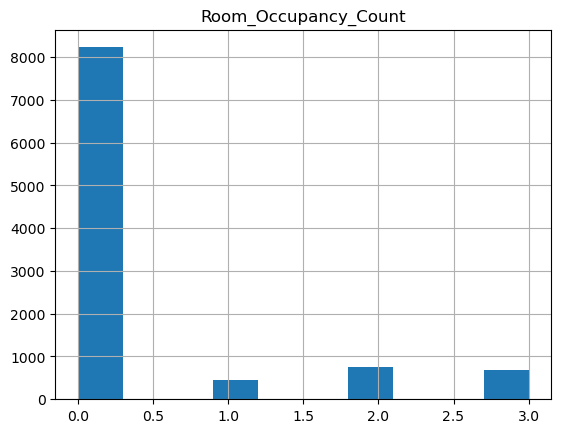

In [5]:
df.hist(column = 'Room_Occupancy_Count')

Classes are umbalances, will need to stratify train_test_split based on `Room_Occupancy_Count`

In [6]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

We focus only on the sensor prediction, so we can remove the `Date` and `Time` columns

In [7]:
#df = df.drop(columns = ['Date','Time'])

# EDA

ValueError: could not convert string to float: '2017/12/22'

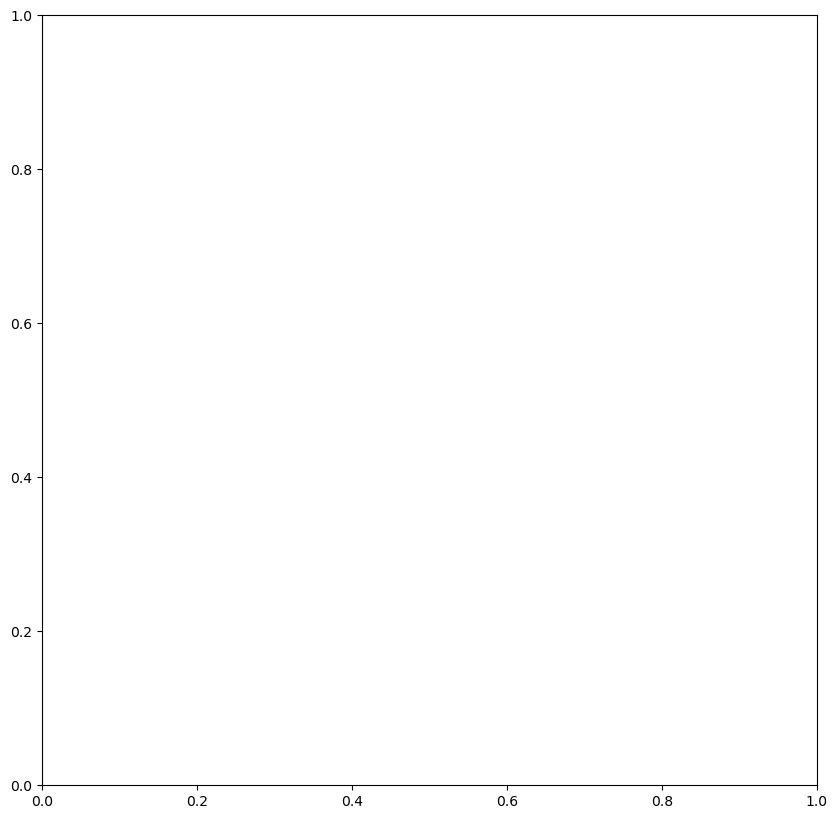

In [8]:
plt.subplots(1,1,figsize= (10,10))
sns.heatmap(df.corr(),cmap = 'coolwarm',annot=True)

In [9]:
sns.pairplot(df, x_vars=['Time'], y_vars=['S1_Sound','S2_Sound','S3_Sound','S4_Sound'],hue='Room_Occupancy_Count' )

KeyboardInterrupt: 

: 

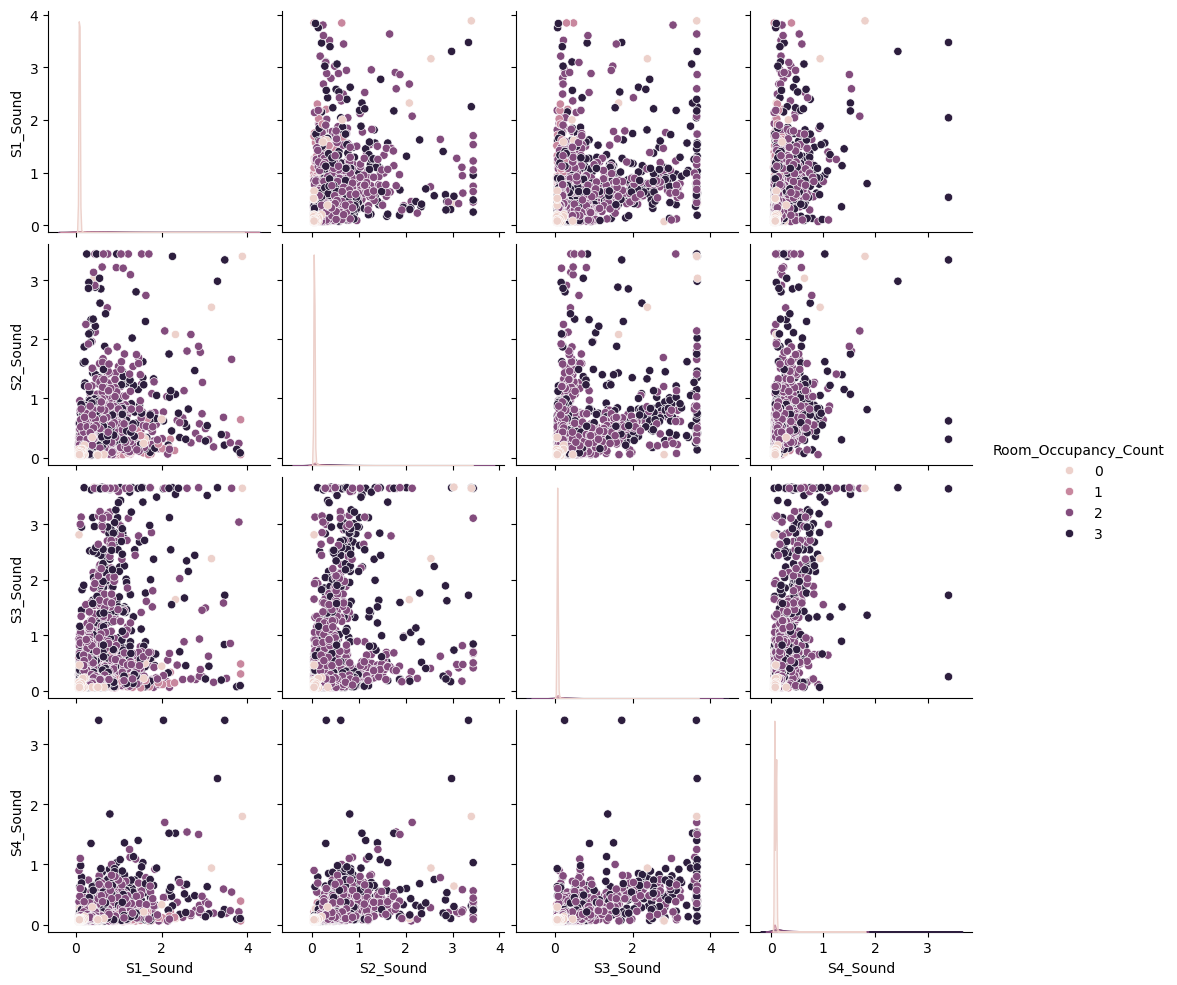

In [59]:
sns.pairplot(df, vars=['S1_Sound','S2_Sound','S3_Sound','S4_Sound'], hue='Room_Occupancy_Count' )

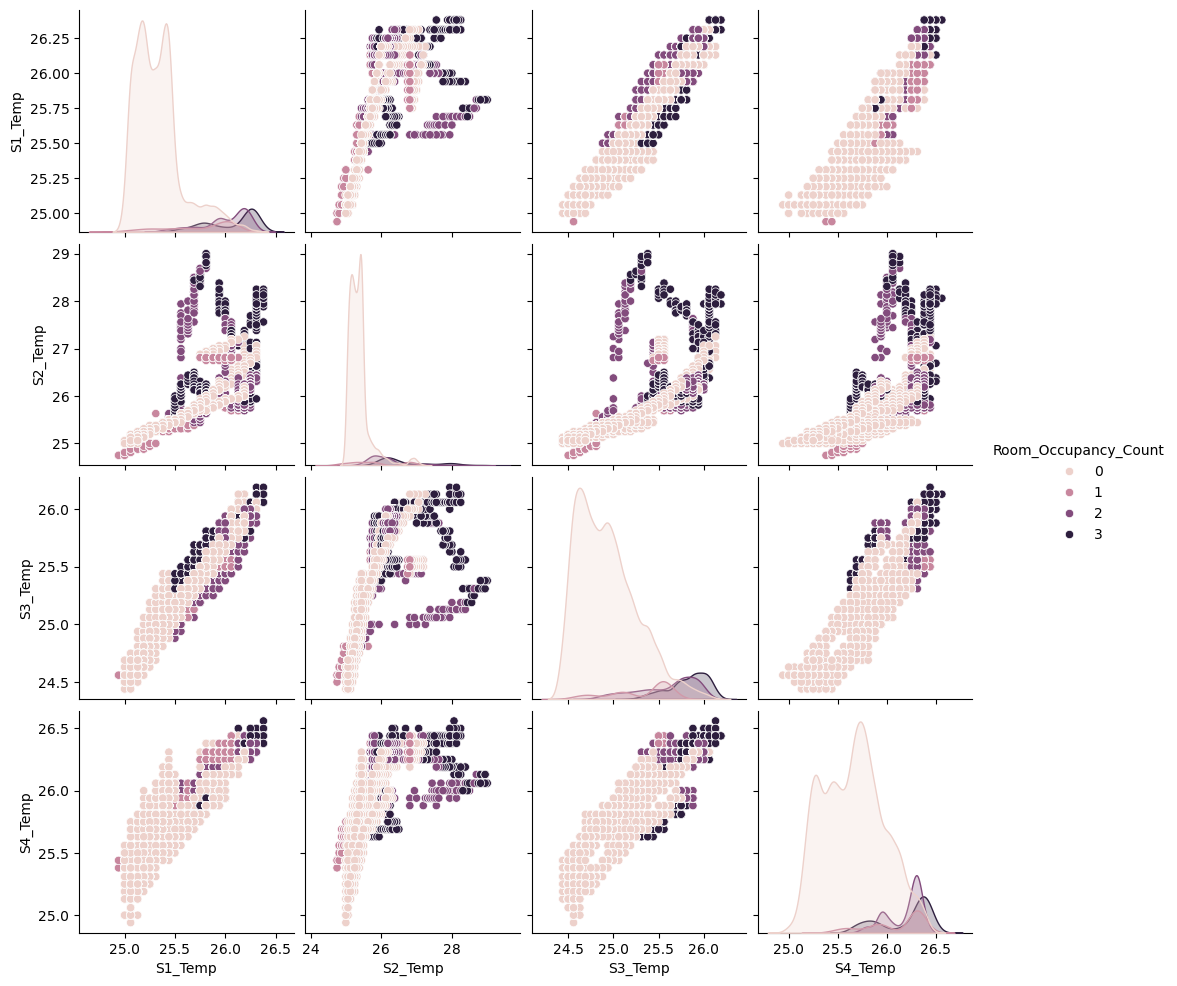

In [60]:
sns.pairplot(df, vars=['S1_Temp','S2_Temp','S3_Temp','S4_Temp'], hue='Room_Occupancy_Count' )

In [51]:
df['avg_temp'] = df[['S1_Temp','S2_Temp','S3_Temp','S4_Temp']].sum(axis=1)/4

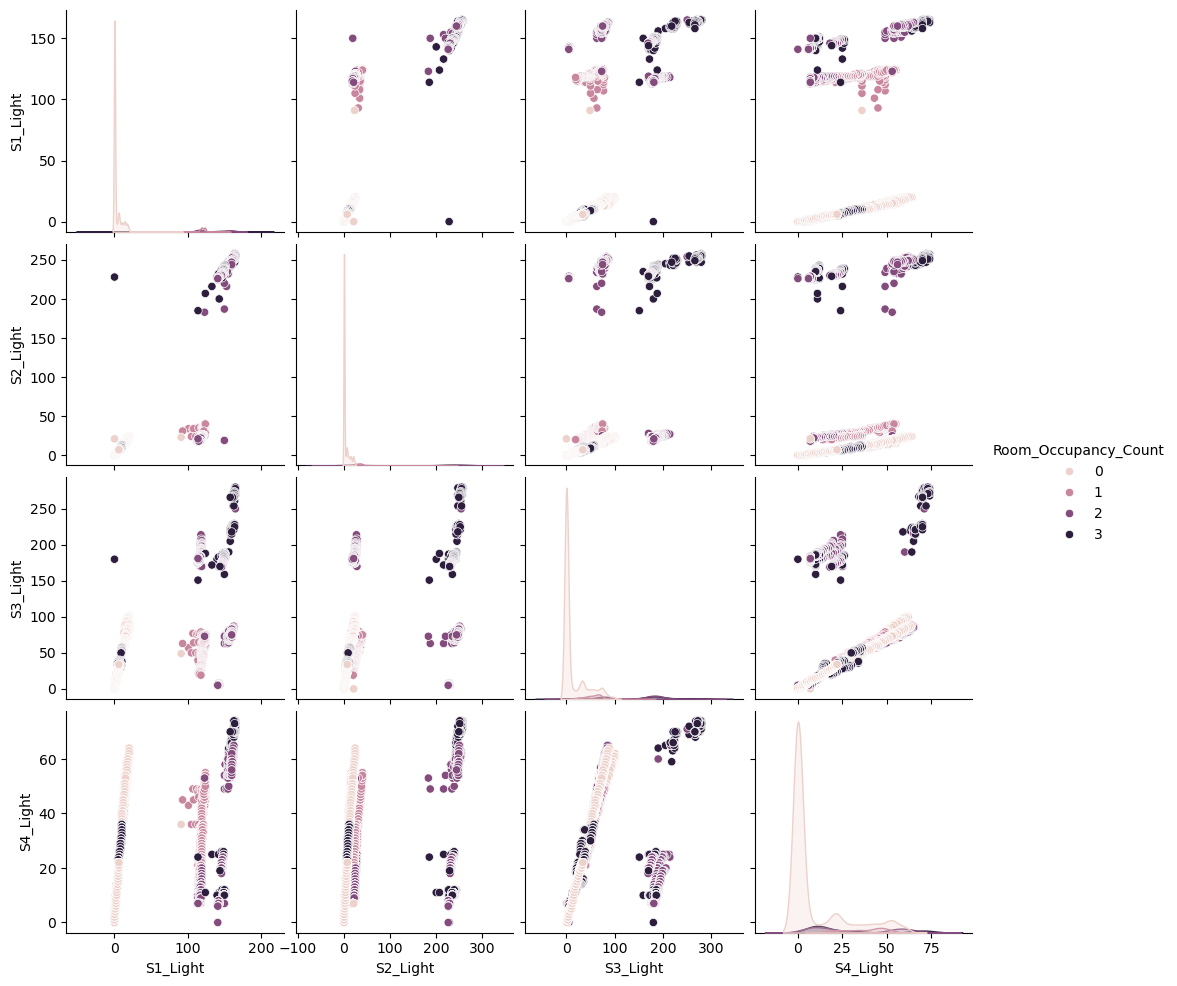

In [61]:
sns.pairplot(df, vars=['S1_Light','S2_Light','S3_Light','S4_Light'], hue='Room_Occupancy_Count' )

In [52]:
df['avg_light'] = df[['S1_Light','S2_Light','S3_Light','S4_Light']].sum(axis=1)/4

In [53]:
df['avg_sound'] = df[['S1_Sound','S2_Sound','S3_Sound','S4_Sound']].sum(axis=1)/4

In [57]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,avg_temp,avg_light,avg_sound,avg_PIR
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,...,0.06,390,0.769231,0,0,1,24.9075,62.00,0.0975,0.0
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,...,0.06,390,0.646154,0,0,1,24.9225,61.75,0.2750,0.0
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,...,0.06,390,0.519231,0,0,1,24.9225,62.00,0.1700,0.0
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,...,0.09,390,0.388462,0,0,1,24.9375,62.00,0.1750,0.0
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,...,0.06,390,0.253846,0,0,1,24.9375,62.25,0.0900,0.0


In [56]:
df['avg_PIR'] = df[['S6_PIR','S7_PIR']].sum(axis=1)/2